In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import time
import networkx as nx

from Algorithms.LAIM import *
from Algorithms.TIM  import *
from Diffusion.Model import *
from tqdm import tqdm

sns.set_style("darkgrid")

In [7]:
n_seeds = 50
n_trials = 5
t_horizon = 50
graph = nx.gnm_random_graph(15000, 31000, directed=False) # Approximates the NETHEPT topology.
ffm = {node: {factor: random.random() for factor in "OCEAN"} for node in graph.nodes()}
opinion = [random.random() for node in graph.nodes()]
model = BIC(graph, ffm, opinion)
data = { "algorithm": [], "opinion": [], "activated": [], "visited": [], "time": []}

In [8]:
for i in tqdm(range(n_trials)):
    start = time.time()
    seed_set = TIM_solution(model, n_seeds)
    TIM_time = time.time() - start
    model.prepare()
    opinion, activated_set, visited_set = model.simulate(seed_set, t_horizon)
    data["algorithm"].append("TIM")
    data["opinion"].append(opinion)
    data["activated"].append(len(activated_set))
    data["visited"].append(len(visited_set))
    data["time"].append(TIM_time)

100%|██████████| 5/5 [16:20<00:00, 196.09s/it]


In [9]:
for i in tqdm(range(n_trials)):
    start = time.time()
    seed_set = LAIM_solution(model, n_seeds)
    LAIM_time = time.time() - start
    model.prepare()
    opinion, activated_set, visited_set = model.simulate(seed_set, t_horizon)
    data["algorithm"].append("LAIM")
    data["opinion"].append(opinion)
    data["activated"].append(len(activated_set))
    data["visited"].append(len(visited_set))
    data["time"].append(LAIM_time)

100%|██████████| 5/5 [14:05<00:00, 169.02s/it]


In [10]:
for i in tqdm(range(n_trials)):
    start = time.time()
    seed_set = fast_LAIM_solution(model, n_seeds)
    fast_LAIM_time = time.time() - start
    model.prepare()
    opinion, activated_set, visited_set = model.simulate(seed_set, t_horizon)
    data["algorithm"].append("FastLAIM")
    data["opinion"].append(opinion)
    data["activated"].append(len(activated_set))
    data["visited"].append(len(visited_set))
    data["time"].append(fast_LAIM_time)

100%|██████████| 5/5 [00:05<00:00,  1.14s/it]


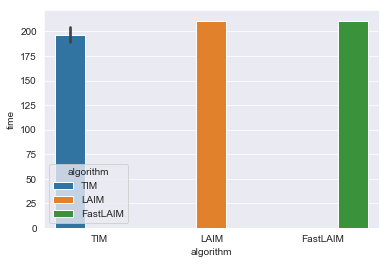

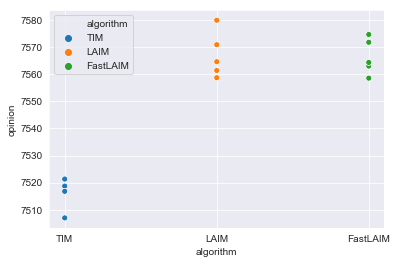

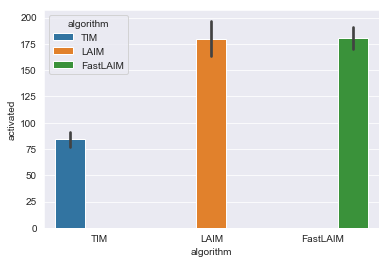

In [15]:
df = pd.DataFrame.from_dict(data)
sns.barplot(x="algorithm", y="time", hue="algorithm", data=df)
plt.show()
sns.scatterplot(x="algorithm", y="opinion", hue="algorithm", data=df)
plt.show()
sns.barplot(x="algorithm", y="activated", hue="algorithm", data=df)
plt.show()

# Finds?
Umm, interestingly, the `TIM+` algorithm does seem to massively underperform in terms of maximizing $|\mathcal{A}_T|$ relative to `LAIM` and `FastLAIM`. Maybe we need to investigate the algorithm for correctness because there may be a non-breaking logical bug involved with this underperformance?